In [1]:
import torch
from tqdm import tqdm
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/processed_classData (1).csv")

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['fault_label'] = le.fit_transform(data['fault_type'])

In [ ]:
data

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_status,fault_type,Ia_rms,Ib_rms,Ic_rms,Va_rms,Vb_rms,Vc_rms,fault_label
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1,LG - A to Ground,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019,0
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1,LG - A to Ground,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019,0
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1,LG - A to Ground,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019,0
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1,LG - A to Ground,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019,0
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1,LG - A to Ground,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0,No Fault,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259,5
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0,No Fault,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259,5
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0,No Fault,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259,5
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0,No Fault,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259,5


In [5]:
features=data[['Ia_rms', 'Ib_rms', 'Ic_rms', 'Va_rms', 'Vb_rms', 'Vc_rms']]
labels=data['fault_label']

In [ ]:
features

,Ia_rms,Ib_rms,Ic_rms,Va_rms,Vb_rms,Vc_rms
0,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019
1,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019
2,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019
3,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019
4,617.085918,50.945561,35.643776,0.265255,0.428420,0.239019
...,...,...,...,...,...,...
7856,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259
7857,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259
7858,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259
7859,45.883401,56.382365,53.390985,0.429198,0.426361,0.430259


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled= scaler.fit_transform(features)

In [8]:
features_scaled

array([[ 0.8778388 , -1.12995734, -0.87198929,  0.15910211,  1.00923018,
        -0.30382051],
       [ 0.8778388 , -1.12995734, -0.87198929,  0.15910211,  1.00923018,
        -0.30382051],
       [ 0.8778388 , -1.12995734, -0.87198929,  0.15910211,  1.00923018,
        -0.30382051],
       ...,
       [-1.15315605, -1.10955438, -0.80438031,  1.16955891,  0.99586304,
         1.15785135],
       [-1.15315605, -1.10955438, -0.80438031,  1.16955891,  0.99586304,
         1.15785135],
       [-1.15315605, -1.10955438, -0.80438031,  1.16955891,  0.99586304,
         1.15785135]])

In [9]:
from torch.utils.data import Dataset,DataLoader

In [10]:
class Fault_detection_dataset(Dataset):
  def __init__(self,features,labels):
    super().__init__()
    self.X=features
    self.y=labels
  def __len__(self):
    return len(self.y)
  def __getitem__(self,idx):
    return self.X[idx], self.y[idx]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Convert y_train and y_test to numpy arrays to ensure positional indexing
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [12]:
dataset_train = Fault_detection_dataset(X_train, y_train)
dataloader_train = DataLoader(
    dataset_train,
    batch_size=2,
    shuffle=True
)

In [13]:
dataset_test = Fault_detection_dataset(X_test, y_test)
dataloader_test = DataLoader(
    dataset_test,
    batch_size=2,
    shuffle=False # Typically, shuffling is not needed for test data
)

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.Fc1=nn.Linear(6,32)
    self.Fc2=nn.Linear(32,16)
    self.Fc3=nn.Linear(16,6)

  def forward(self,x):
    x=F.relu(self.Fc1(x))
    x=F.relu(self.Fc2(x))
    x=self.Fc3(x)
    return x

In [16]:
net=Net()

In [17]:
import torch.optim as optim
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=0.001)

# Move the model to the appropriate device (CPU or GPU)
net.to(device)

for epoch in range(1000):
  for X , y in dataloader_train:
    # Convert input features to float32 and move to the device
    X = X.float().to(device)
    # Convert labels to long and move to the device (CrossEntropyLoss expects long type)
    y = y.long().to(device)

    optimizer.zero_grad()
    output=net(X)
    loss=criterion(output,y)
    loss.backward()
    optimizer.step()

In [18]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 21.9 MB/s eta 0:00:00


In [19]:
from torchmetrics.classification import MulticlassConfusionMatrix,Accuracy
acc=Accuracy(num_classes=6,task="multiclass").to(device)
cm=MulticlassConfusionMatrix(num_classes=6).to(device)

In [20]:
net.eval()

Net(
  (Fc1): Linear(in_features=6, out_features=32, bias=True)
  (Fc2): Linear(in_features=32, out_features=16, bias=True)
  (Fc3): Linear(in_features=16, out_features=6, bias=True)
)

In [21]:
with torch.no_grad():
  for inputs,targets in dataloader_test:
    inputs = inputs.float().to(device) # Move inputs to the same device as the model
    targets = targets.long().to(device) # Move targets to the same device
    outputs=net(inputs)
    acc_batch=acc(outputs,targets)
    cm_batch=cm(outputs,targets)

In [22]:
accuracy=acc_batch.cpu().numpy()
confusion_matrix=cm_batch.cpu().numpy()

In [23]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:{confusion_matrix}")

Accuracy: 1.0
Confusion Matrix:[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]]


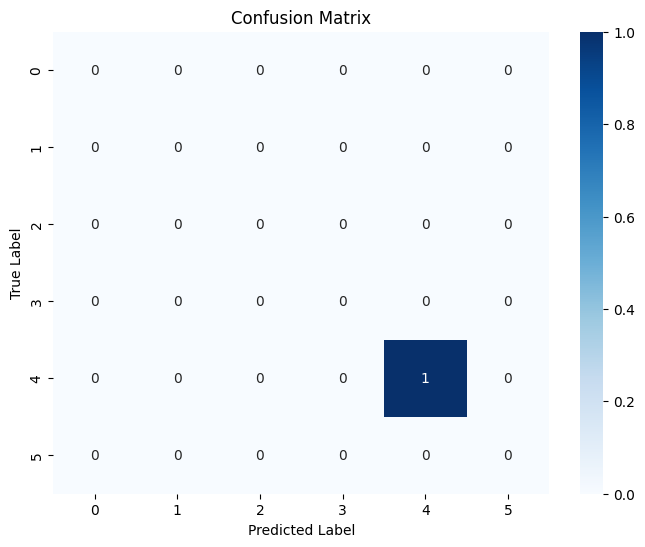

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Global Accuracy: 1.0


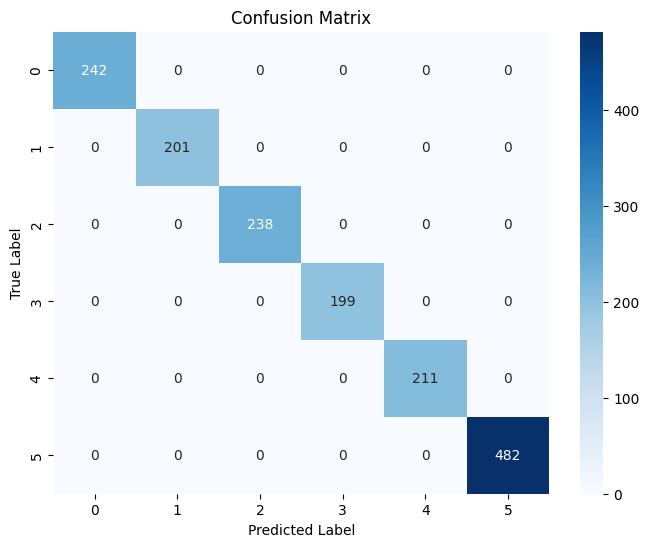

In [27]:
net.eval()
acc.reset() # Clear previous data
cm.reset()

with torch.no_grad():
    for inputs, targets in dataloader_test:
        inputs = inputs.float().to(device) # Convert inputs to float32
        targets = targets.long().to(device)
        outputs = net(inputs)

        # update() accumulates the results across all batches
        acc.update(outputs, targets)
        cm.update(outputs, targets)

# Now compute the global results
final_accuracy = acc.compute()
final_cm = cm.compute()

print(f"Global Accuracy: {final_accuracy}")
plt.figure(figsize=(8, 6))
sns.heatmap(final_cm.cpu().numpy(), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()